In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [48]:
# Step 1: Load and preprocess data
performance_data = pd.read_csv('UCL_AllTime_Performance_Table.csv')
finals_data = pd.read_csv('UCL_Finals_1955-2023.csv')

In [50]:
# Clean data
# Split 'goals' into two columns and convert to integers
performance_data[['Goals_For', 'Goals_Against']] = (
    performance_data['goals']
    .str.split(':', expand=True)
    .iloc[:, :2]  # Only take the first two parts
    .astype(int)
)

# Keep relevant columns
performance_data_cleaned = performance_data[['Team', 'Goals_For']]

# Mark whether a team reached a final
finalist_teams = pd.concat([finals_data['Winners'], finals_data['Runners-up']])
performance_data_cleaned['Reached_Final'] = performance_data_cleaned['Team'].isin(finalist_teams).astype(int)

/var/folders/sw/0yywwfsd301gntyp_bdvm9_h0000gn/T/ipykernel_41632/555783494.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_data_cleaned['Reached_Final'] = performance_data_cleaned['Team'].isin(finalist_teams).astype(int)


In [52]:
# Prepare for logistic regression
X = performance_data_cleaned[['Goals_For']]
y = performance_data_cleaned['Reached_Final']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Train model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [56]:
# Evaluate model
y_pred = log_reg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Did Not Reach Final', 'Reached Final']))

                     precision    recall  f1-score   support

Did Not Reach Final       0.94      0.98      0.96        95
      Reached Final       0.75      0.50      0.60        12

           accuracy                           0.93       107
          macro avg       0.84      0.74      0.78       107
       weighted avg       0.92      0.93      0.92       107



/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


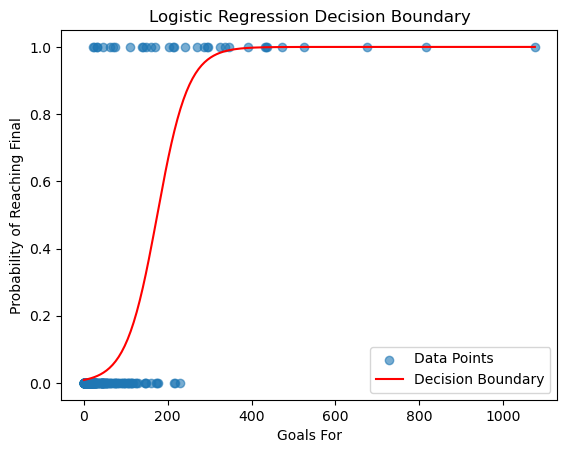

In [58]:
# Plot Decision Boundaries

# Create a range of values for Goals_For
X_range = np.linspace(X['Goals_For'].min(), X['Goals_For'].max(), 300).reshape(-1, 1)

# Predict probabilities for this range
probs = log_reg.predict_proba(X_range)[:, 1]

# Plot the data points
plt.scatter(X['Goals_For'], y, label='Data Points', alpha=0.6)

# Plot the decision boundary
plt.plot(X_range, probs, color='red', label='Decision Boundary')

# Add labels and legend
plt.xlabel('Goals For')
plt.ylabel('Probability of Reaching Final')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


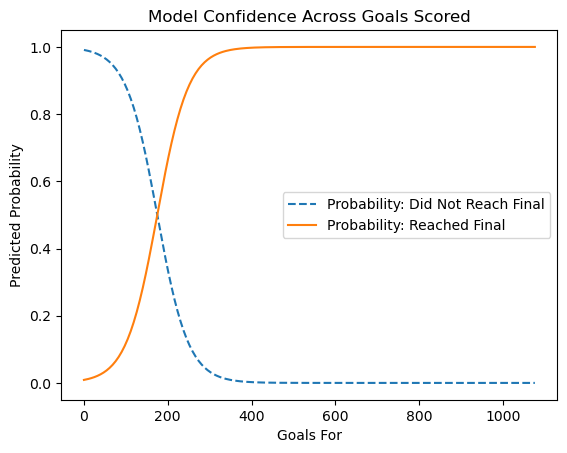

In [60]:
# Generate a smooth range of values for 'Goals_For'
X_range = np.linspace(X['Goals_For'].min(), X['Goals_For'].max(), 300).reshape(-1, 1)

# Predict probabilities for both classes
probs = log_reg.predict_proba(X_range)

# Plot probabilities for both classes
plt.plot(X_range, probs[:, 0], label='Probability: Did Not Reach Final', linestyle='--')
plt.plot(X_range, probs[:, 1], label='Probability: Reached Final', linestyle='-')

# Add labels and legend
plt.xlabel('Goals For')
plt.ylabel('Predicted Probability')
plt.title('Model Confidence Across Goals Scored')
plt.legend()
plt.show()